# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

# Natural Language Processing

1. nltk – Natural Language Toolkit is a collection of libraries for natural language processing

2. stopwords – a collection of words that don’t provide any meaning to a sentence

3. WordNetLemmatizer – used to convert different forms of words into a single item but still keeping the context intact

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Scikit-Learn (Machine Learning Library for Python)

1. CountVectorizer – transform text to vectors

2. GridSearchCV – for hyperparameter tuning

3. RandomForestClassifier – machine learning algorithm for classification

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

# Load the dataset

In [5]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

Now, we will concatenate these two data frames, as we will be using cross-validation and we have a separate test dataset, so we don’t need a separate validation set of data. And, then we will reset the index to avoid duplicate indexes.

In [6]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [7]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
print("Shape of the DataFrame:",df.shape)


Shape of the DataFrame: (18000, 2)


In [9]:
print(df.sample(5))

                                                    text    label
4665   i cannot seem to shake this feeling of being c...  sadness
7104   i feel that i was a girl that always being foo...  sadness
13983  i find myself crying over loosing everything t...     love
9913   i basically wrote this for my future self i m ...     love
12083  i feel even more strongly now that this can be...      joy


Now, we will check for the various target labels in our dataset using seaborn.

<Axes: xlabel='label', ylabel='count'>

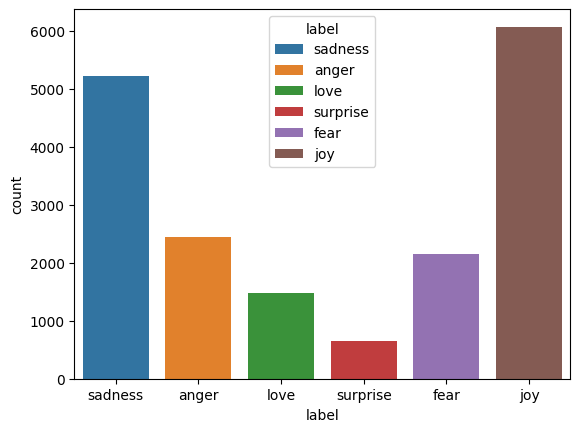

In [13]:
sns.countplot(df,x='label',hue='label',legend=True)

As we can see that, we have 6 labels or targets in the dataset. We can make a multi-class classifier for Sentiment Analysis. But, for the sake of simplicity, we will merge these labels into two classes, i.e. Positive and Negative sentiment.

In [14]:
def custom_encoder(df):#1 --> Positive,2 --> Negative
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
custom_encoder(df['label'])

In [15]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
...,...,...
17995,im having ssa examination tomorrow in the morn...,0
17996,i constantly worry about their fight against n...,1
17997,i feel its important to share this info for th...,1
17998,i truly feel that if you are passionate enough...,1


<Axes: xlabel='label', ylabel='count'>

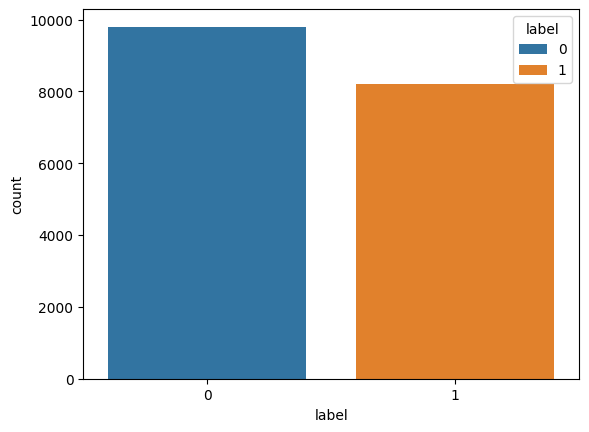

In [17]:
sns.countplot(df,x='label',hue = 'label')

Now, we can see that our target has changed to 0 and 1,i.e. 0 for Negative and 1 for Positive, and the data is more or less in a balanced state.

# Data Pre-processing

Now, we will perform some pre-processing on the data before converting it into vectors and passing it to the machine learning model.

We will create a function for pre-processing of data.

1. First, we will iterate through each record, and using a regular expression, we will get rid of any characters apart from alphabets.

2. Then, we will convert the string to lowercase as, the word “Good” is different from the word “good”.

Because, without converting to lowercase, it will cause an issue when we will create vectors of these words, as two different vectors will be created for the same word which we don’t want to.

3. Then we will check for stopwords in the data and get rid of them. Stopwords are commonly used words in a sentence such as “the”, “an”, “to” etc. which do not add much value.

4. Then, we will perform lemmatization on each word,i.e. change the different forms of a word into a single item called a lemma.

A lemma is a base form of a word. For example, “run”, “running” and “runs” are all forms of the same lexeme, where the “run” is the lemma. Hence, we are converting all occurrences of the same lexeme to their respective lemma.

5. And, then return a corpus of processed data.

But first, we will create an object of WordNetLemmatizer and then we will perform the transformation.

In [19]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [23]:
corpus = text_transformation(df['text'])

# Bag of Words
Now, we will use the Bag of Words Model(BOW), which is used to represent the text in the form of a bag of words,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity,i.e. (the number of times a word occurs in a document) is the main point of concern.

Basically, it describes the total occurrence of words within a document.

In [24]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

We will take ngram_range as (1,2) which signifies a bigram.

Ngram is a sequence of ‘n’ of words in a row or sentence. ‘ngram_range’ is a parameter, which we use to give importance to the combination of words, such as, “social media” has a different meaning than “social” and “media” separately.



# Model training

In [27]:
hyperparameters = {
    'n_estimators':500,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': True
}

# Create the RandomForestClassifier with the specified hyperparameters
model = RandomForestClassifier(**hyperparameters)

In [29]:
model = RandomForestClassifier()

In [32]:
# Train the model on the training data
model.fit(X, y)

DecisionTreeClassifier()

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# Test Data Transformation

Now, we will read the test data and perform the same transformations we did on training data and finally evaluate the model on its predictions.

In [33]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = model.predict(testdata)

# Model Evaluation

We will evaluate our model using various metrics such as Accuracy Score, Precision Score, Recall Score, Confusion Matrix and create a roc curve to visualize how our model performed.

Accuracy_score:  0.9425
Precision_score:  0.9232386961093586
Recall_score:  0.9543478260869566
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1080
           1       0.92      0.95      0.94       920

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



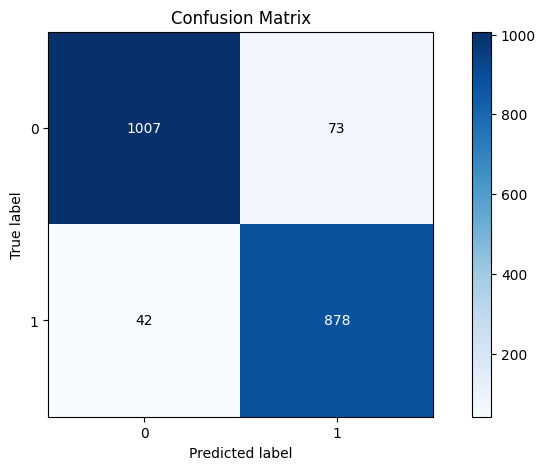

In [34]:
plt.rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)